In [2]:
from calibrimbore import sauron

/Users/rridden/miniconda3/lib/python3.7/site-packages/calibrimbore/calibrimbore.py:268: RuntimeWarning: divide by zero encountered in log10
  comp = -2.5*np.log10(comp) + 25 # default PS1 image zeropoint
/Users/rridden/miniconda3/lib/python3.7/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


<IPython.core.display.Math object>

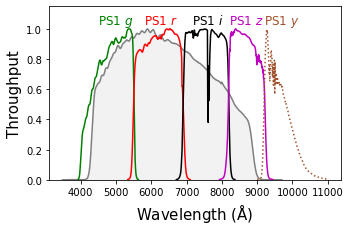

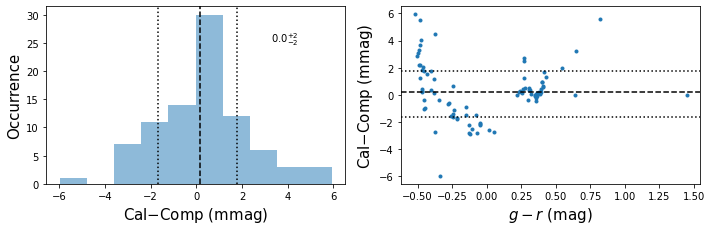

In [5]:
cal = sauron(band='/Users/rridden/Documents/work/code/source_synphot/source_synphot/passbands/Kepler/Kepler_k.dat',plot=True)

In [1]:
from astropy.coordinates import SkyCoord
from astropy.coordinates import SkyCoord, Angle
import pandas as pd

In [2]:
ra = 11
dec = 30
size = 600
Catalog = 'ps1'

In [3]:
c1 = SkyCoord(ra, dec, frame='icrs', unit='deg')
from astroquery.vizier import Vizier
Vizier.ROW_LIMIT = -1
if Catalog == 'gaia':
    catalog = "I/345/gaia2"
elif Catalog == 'dist':
    catalog = "I/347/gaia2dis"
elif Catalog == 'ps1':
    catalog = "II/349/ps1"
elif Catalog == 'skymapper':
    catalog = 'II/358/smss'
else:
    raise ValueError("{} not recognised as a catalog. Available options: 'gaia', 'dist','ps1'")

result = Vizier.query_region(c1, catalog=[catalog],
                             radius=Angle(size, "arcsec"))
no_targets_found_message = ValueError('Either no sources were found in the query region '
                                      'or Vizier is unavailable')
#too_few_found_message = ValueError('No sources found brighter than {:0.1f}'.format(magnitude_limit))
if result is None:
    raise no_targets_found_message
elif len(result) == 0:
    raise no_targets_found_message
result = result[catalog].to_pandas()

In [4]:
result

,RAJ2000,DEJ2000,objID,f_objID,Qual,e_RAJ2000,e_DEJ2000,_tab1_10,Ns,Nd,...,zmag,e_zmag,zKmag,e_zKmag,zFlags,ymag,e_ymag,yKmag,e_yKmag,yFlags
0,11.160079,30.090355,144100111601229018,436527104,52,0.0219,0.0236,56006.434699,5,27,...,20.5391,0.0560,20.4684,0.1276,16892216,19.2761,0.1484,18.6252,0.1508,16892216
1,11.117175,30.130419,144150111171407125,436527104,52,0.0124,0.0066,56057.955567,5,43,...,19.5995,0.0227,19.6041,0.0686,115000,19.3004,0.0499,19.2694,0.1636,115000
2,11.134090,29.883760,143860111341301121,444915712,53,0.0525,0.0593,55925.337118,4,9,...,21.3044,0.1426,21.0715,0.0946,16892216,NaN,NaN,NaN,NaN,114720
3,11.127824,29.879684,143850111278166213,444915712,53,0.0082,0.0175,56025.374734,5,50,...,19.2422,0.0159,19.1729,0.0356,16892216,18.8916,0.0227,18.7792,0.0804,115000
4,11.142515,29.894304,143870111424933767,436527104,52,0.0258,0.0300,55992.224190,5,27,...,20.9206,0.0751,20.9435,0.0760,115000,NaN,NaN,NaN,NaN,114720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1818,10.942313,30.143502,144170109423272812,436527104,52,0.0105,0.0106,56138.564155,5,46,...,19.4870,0.0326,19.5651,0.0618,115000,19.1871,0.0518,19.2454,0.0616,115000
1819,10.939394,30.153564,144180109393974859,436527104,52,0.0120,0.0053,56310.768519,5,46,...,18.2653,0.0091,18.3584,0.0100,115000,18.0757,0.0187,18.2394,0.0725,115000
1820,10.953506,30.159023,144190109535121418,444915712,53,0.0073,0.0083,56304.737859,5,48,...,19.3164,0.0255,18.7512,0.0356,16892216,18.8228,0.0515,18.5167,0.0449,16892216
1821,10.944302,30.151281,144180109443122122,444915712,53,0.0786,0.0782,56208.944907,6,36,...,20.9319,0.0791,20.1491,0.1638,16892216,NaN,NaN,NaN,NaN,114720


In [80]:
ra = result.RAJ2000.values
dec = result.DEJ2000.values
ra = np.append(ra,1)
dec = np.append(dec,10)
size = 4

In [81]:
from astropy.table import Table
from astropy import units as u
from copy import deepcopy

In [82]:
tab = Table(data=[ra*u.deg,dec*u.deg],names=['_RAJ2000','_DEJ2000'])

In [83]:
tab.to_pandas()

,_RAJ2000,_DEJ2000
0,11.160079,30.090355
1,11.117175,30.130419
2,11.134090,29.883760
3,11.127824,29.879684
4,11.142515,29.894304
...,...,...
2047,10.953506,30.159023
2048,10.944593,30.151194
2049,10.944302,30.151281
2050,10.968186,30.161658


In [84]:
res = Vizier.query_region(tab, catalog=[catalog], radius=3*u.arcsec)

DEBUG: HTTP request
	-----------------------------------------
	POST http://vizier.u-strasbg.fr/viz-bin/votable
	User-Agent: astroquery/0.4.3.dev6762 python-requests/2.25.1
	Accept-Encoding: gzip, deflate
	Accept: */*
	Connection: keep-alive
	Content-Length: 49397

	-source=II/349/ps1
	-out=*
	-out.add=_q
	-out.max=unlimited
	-c.rs=3.0
	-out.meta=huUD
	-out.form=mini
	-oc.form=d
	-c=<<====AstroqueryList
	11.16007905+30.09035480
	11.11717476+30.13041897
	11.13409035+29.88375995
	11.12782383+29.87968367
	11.14251519+29.89430359
	11.15744125+29.90580041
	11.14721604+29.89913177
	11.04999972+29.84258172
	11.00759705+29.83352789
	11.02386373+29.84988064
	11.02305007+29.84545471
	11.05092216+29.84878227
	11.04795015+29.84566855
	11.04419207+29.84760604
	11.03049838+29.84931384
	11.01458613+29.85023368
	11.01396015+29.84992964
	11.02468271+29.83942679
	11.02911215+29.84986828
	11.01224588+29.85140226
	11.04095411+29.85084295
	11.02552834+29.86460232
	11.03527048+29.85644575
	11.01458613+29.85

DEBUG: Caching data to /Users/rridden/.astropy/cache/astroquery/Vizier/8e33dd1d10447eef7619d9ff997c381a04b37f23e491e5786e5932a0.pickle [astroquery.query]


In [79]:
res

Empty TableList

In [78]:
res[catalog].to_pandas()


TypeError: TableLists can only be indexed with the named keys and integers.

In [20]:
import numpy as np

In [91]:
result = res[catalog].to_pandas()

targets = tab.to_pandas()

dist = np.zeros((len(targets),len(result)))

dist = ((targets['_RAJ2000'].values[:,np.newaxis] - result['RAJ2000'].values[np.newaxis,:])**2 +
        (targets['_DEJ2000'].values[:,np.newaxis] - result['DEJ2000'].values[np.newaxis,:])**2)

min_ind = np.argmin(dist,axis=1)
ind = np.nanmin(dist,axis=1) <= 3

min_ind2 = np.argmin(dist,axis=0)

r = deepcopy(result.iloc[min_ind])

final = deepcopy(targets)
final['ra'] = np.nan
final['dec'] = np.nan
final['g'] = np.nan; final['r'] = np.nan; final['i'] = np.nan; 
final['z'] = np.nan; final['y'] = np.nan
final['g_e'] = np.nan; final['r_e'] = np.nan; final['i_e'] = np.nan; 
final['z_e'] = np.nan; final['y_e'] = np.nan

final['g'].iloc[ind] = r['gmag'].values[ind]; final['r'].iloc[ind] = r['rmag'].values[ind]; final['i'].iloc[ind] = r['imag'].values[ind]
final['z'].iloc[ind] = r['zmag'].values[ind]; final['y'].iloc[ind] = r['ymag'].values[ind]

final['g_e'].iloc[ind] = r['e_gmag'].values[ind]; final['r_e'].iloc[ind] = r['e_rmag'].values[ind]; final['i_e'].iloc[ind] = r['e_imag'].values[ind]
final['z_e'].iloc[ind] = r['e_zmag'].values[ind]; final['y_e'].iloc[ind] = r['e_ymag'].values[ind]
final['ra'].iloc[ind] = r['RAJ2000'].values[ind]; final['dec'].iloc[ind] = r['DEJ2000'].values[ind]

In [92]:
final

,_RAJ2000,_DEJ2000,ra,dec,g,r,i,z,y,g_e,r_e,i_e,z_e,y_e
0,11.160079,30.090355,11.160079,30.090355,22.1143,21.3173,20.7155,20.5391,19.2761,0.1612,0.0362,0.0291,0.0560,0.1484
1,11.117175,30.130419,11.117175,30.130419,20.7544,20.0074,19.7620,19.5995,19.3004,0.0230,0.0113,0.0101,0.0227,0.0499
2,11.134090,29.883760,11.134090,29.883760,NaN,NaN,21.5670,21.3044,NaN,NaN,NaN,0.0631,0.1426,NaN
3,11.127824,29.879684,11.127824,29.879684,21.8691,20.7137,19.7364,19.2422,18.8916,0.1357,0.0358,0.0160,0.0159,0.0227
4,11.142515,29.894304,11.142515,29.894304,22.0730,21.4354,21.1909,20.9206,NaN,0.1079,0.0359,0.0256,0.0751,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2047,10.953506,30.159023,10.953506,30.159023,21.3338,20.0620,19.5282,19.3164,18.8228,0.0698,0.0361,0.0416,0.0255,0.0515
2048,10.944593,30.151194,10.944593,30.151194,NaN,21.0373,20.6854,NaN,NaN,NaN,0.1664,0.3688,NaN,NaN
2049,10.944302,30.151281,10.944302,30.151281,21.6352,20.9055,21.2574,20.9319,NaN,0.0673,0.0636,0.0646,0.0791,NaN
2050,10.968186,30.161658,10.968186,30.161658,21.8252,20.8818,20.8345,20.6565,20.4612,0.0899,0.0655,0.0457,0.1980,0.1433


In [63]:
len(min_ind2)

2051

In [56]:
min_ind

array([   0,    1,    2, ..., 2047, 2029, 2050])

In [53]:
(final['g'].iloc[min_ind])

IndexError: positional indexers are out-of-bounds

In [50]:
from cali

1823

In [51]:
len(min_ind2)

2051

In [47]:
len(r['gmag'].values)

1823

In [ ]:
result = Vizier.query_region(c1, catalog=[catalog],
                             radius=Angle(size, "arcsec"))
no_targets_found_message = ValueError('Either no sources were found in the query region '
                                      'or Vizier is unavailable')
#too_few_found_message = ValueError('No sources found brighter than {:0.1f}'.format(magnitude_limit))
if result is None:
    raise no_targets_found_message
elif len(result) == 0:
    raise no_targets_found_message
result = result[catalog].to_pandas()